# IMPORTAR BIBLIOTECAS E BASES DE DADOS

In [1]:
pip install tensorflow

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install plotly
!pip3 install --upgrade nbformat
!pip3 install nltk
!pip3 install spacy 
!pip3 install wordcloud
!pip3 install gensim 
!pip3 install pandas
!pip3 install numpy
!pip3 install matplotlib
!pip3 install seaborn


import nltk
nltk.download('punkt')

import tensorflow as tf
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from tensorflow.keras.models import Model


You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.
Requirement already up-to-date: nbformat in /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages (5.0.8)
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.
You should conside

In [3]:
trueN = pd.read_csv("True.csv")
fakeN = pd.read_csv("Fake.csv")
true = trueN.sample(6000)
fake = fakeN.sample(6000)


In [4]:
fake.isna().sum() #verificar se existem valores nulos

title      0
text       0
subject    0
date       0
dtype: int64

In [5]:
true.isna().sum() #verificar se existem valores nulos

title      0
text       0
subject    0
date       0
dtype: int64

# REALIZAR ANÁLISE DA BASE

In [6]:
true['rotulo'] = 1
true.head()

,title,text,subject,date,rotulo
10992,New Hampshire to test broader appeal of Cruz's...,"HENNIKER, New Hampshire (Reuters) - Republican...",politicsNews,"February 3, 2016",1
5498,Iraq says will stay clear of U.S.-Iran tensions,BAGHDAD (Reuters) - Iraq won’t take part in an...,politicsNews,"February 11, 2017",1
16379,Catalan leader says not enough guarantees from...,MADRID (Reuters) - Catalan leader Carles Puigd...,worldnews,"October 26, 2017",1
3247,U.S. Interior chief recommends shrinking Utah'...,WASHINGTON (Reuters) - U.S. Interior Secretary...,politicsNews,"June 12, 2017",1
18861,Western Sahara independence emissary refuses t...,LIMA (Reuters) - An emissary of an independenc...,worldnews,"September 27, 2017",1


In [7]:
fake['rotulo'] = 0
fake.head()

,title,text,subject,date,rotulo
12025,BOOM! TOMI LAHREN’S Top Tips For Liberals In 2...,,politics,"Dec 31, 2016",0
20141,THUG ANNIVERSARY GETS VIOLENT IN FERGUSON: Cel...,Nothing good can come out of a protest over a ...,left-news,"Aug 10, 2016",0
14516,ALL HELL IS BREAKING LOOSE IN GERMANY: Citizen...,Enough is enough! German citizens are witnessi...,politics,"Feb 7, 2016",0
612,IT’S ON: Toddler Trump Hears Critical McConne...,"Mitch McConnell famously or infamously, depe...",News,"August 9, 2017",0
2882,Sean Spicer Just Gave ‘Alternative Facts’ Abo...,Is there any level to which Trump s press secr...,News,"January 23, 2017",0


In [8]:
# Join
df = pd.concat([true, fake]).reset_index(drop = True)

In [9]:
df.drop(columns = ['date'], inplace = True)

In [10]:
# Combinar titulo e texto
df['News'] = df['title'] + ' ' + df['text']
df.head()

,title,text,subject,rotulo,News
0,New Hampshire to test broader appeal of Cruz's...,"HENNIKER, New Hampshire (Reuters) - Republican...",politicsNews,1,New Hampshire to test broader appeal of Cruz's...
1,Iraq says will stay clear of U.S.-Iran tensions,BAGHDAD (Reuters) - Iraq won’t take part in an...,politicsNews,1,Iraq says will stay clear of U.S.-Iran tension...
2,Catalan leader says not enough guarantees from...,MADRID (Reuters) - Catalan leader Carles Puigd...,worldnews,1,Catalan leader says not enough guarantees from...
3,U.S. Interior chief recommends shrinking Utah'...,WASHINGTON (Reuters) - U.S. Interior Secretary...,politicsNews,1,U.S. Interior chief recommends shrinking Utah'...
4,Western Sahara independence emissary refuses t...,LIMA (Reuters) - An emissary of an independenc...,worldnews,1,Western Sahara independence emissary refuses t...


In [11]:
df['News'][0]

"New Hampshire to test broader appeal of Cruz's Southern conservatism HENNIKER, New Hampshire (Reuters) - Republican presidential hopeful Ted Cruz’s performance in New Hampshire’s primary election on Tuesday will be a referendum on the Southern evangelical’s appeal to Northern conservatives, a breed he is not used to courting. Cruz is fresh off a victory this week in Iowa, the first contest in the race for the nomination ahead of the Nov. 8 presidential election, and the U.S. senator from Texas is betting his undiluted religious conservatism will deliver a strong finish in New Hampshire. Cruz’s campaign does not anticipate a win in New Hampshire. Polling shows national front-runner Donald Trump - who has tighter links with the region as a New Yorker - with a roughly 20 point lead in the state.    But placing second will be crucial if Cruz hopes to keep momentum in a crowded Republican field that includes Marco Rubio, Jeb Bush and John Kasich. It could also foretell his appeal in the po

# #REALIZAR LIMPEZA E TRANSFORMAÇÃO DOS DADOS

In [12]:
ps = PorterStemmer() 
corpus = []
for i in range(0, len(df.News)):
    review = re.sub('[^a-zA-Z]', ' ', df.News[i]) #Removendo tudo exceto a-z and A-Z e caracteres especiais
    review = review.lower() ## Convertendo tudo para caixa baixa
    review = review.split() ##  Spliting 
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')] ##Removendo stop words i.e is ,or ,and etc
    review = ' '.join(review) ## joining 
    corpus.append(review) 
    corpus

In [13]:
from sklearn.feature_extraction.text import CountVectorizer #Vetorizar
vectorizer = CountVectorizer(max_features = 5000, ngram_range=(1,3)) 
bag = vectorizer.fit_transform(corpus).toarray() 


In [14]:
pickle.dump(vectorizer, open("vector.pickle", "wb")) # Salvando para o aplicativo

In [15]:
y= df.rotulo
y

0        1
1        1
2        1
3        1
4        1
        ..
11995    0
11996    0
11997    0
11998    0
11999    0
Name: rotulo, Length: 12000, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bag, y, test_size = 0.2, random_state =0)

# #Naive Bayes

In [17]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
NaiveB=MultinomialNB(alpha=0.7) 
NaiveB.fit(X_train, y_train)
y_naive = NaiveB.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report

accuracy = accuracy_score(y_test, y_naive) # Dentre todas as classificações, quantas o modelo classificou corretamente? 
precision = precision_score(y_test, y_naive) # Dentre todas as classificações de classe Positivo que o modelo fez, quantas estão corretas
recall = recall_score(y_test, y_naive) #  dentre todas as situações de classe Positivo como valor esperado, quantas estão corretas

f1 = f1_score(y_test, y_naive) # média harmônica entre precisão e recall

print("Model Accuracy : ", accuracy)
print("Model Precision : ", precision)
print("Model Recall : ", recall)
print("Model F1 Score : ", f1)

Model Accuracy :  0.9591666666666666
Model Precision :  0.9547359597652976
Model Recall :  0.9628064243448858
Model F1 Score :  0.9587542087542088


<AxesSubplot:>

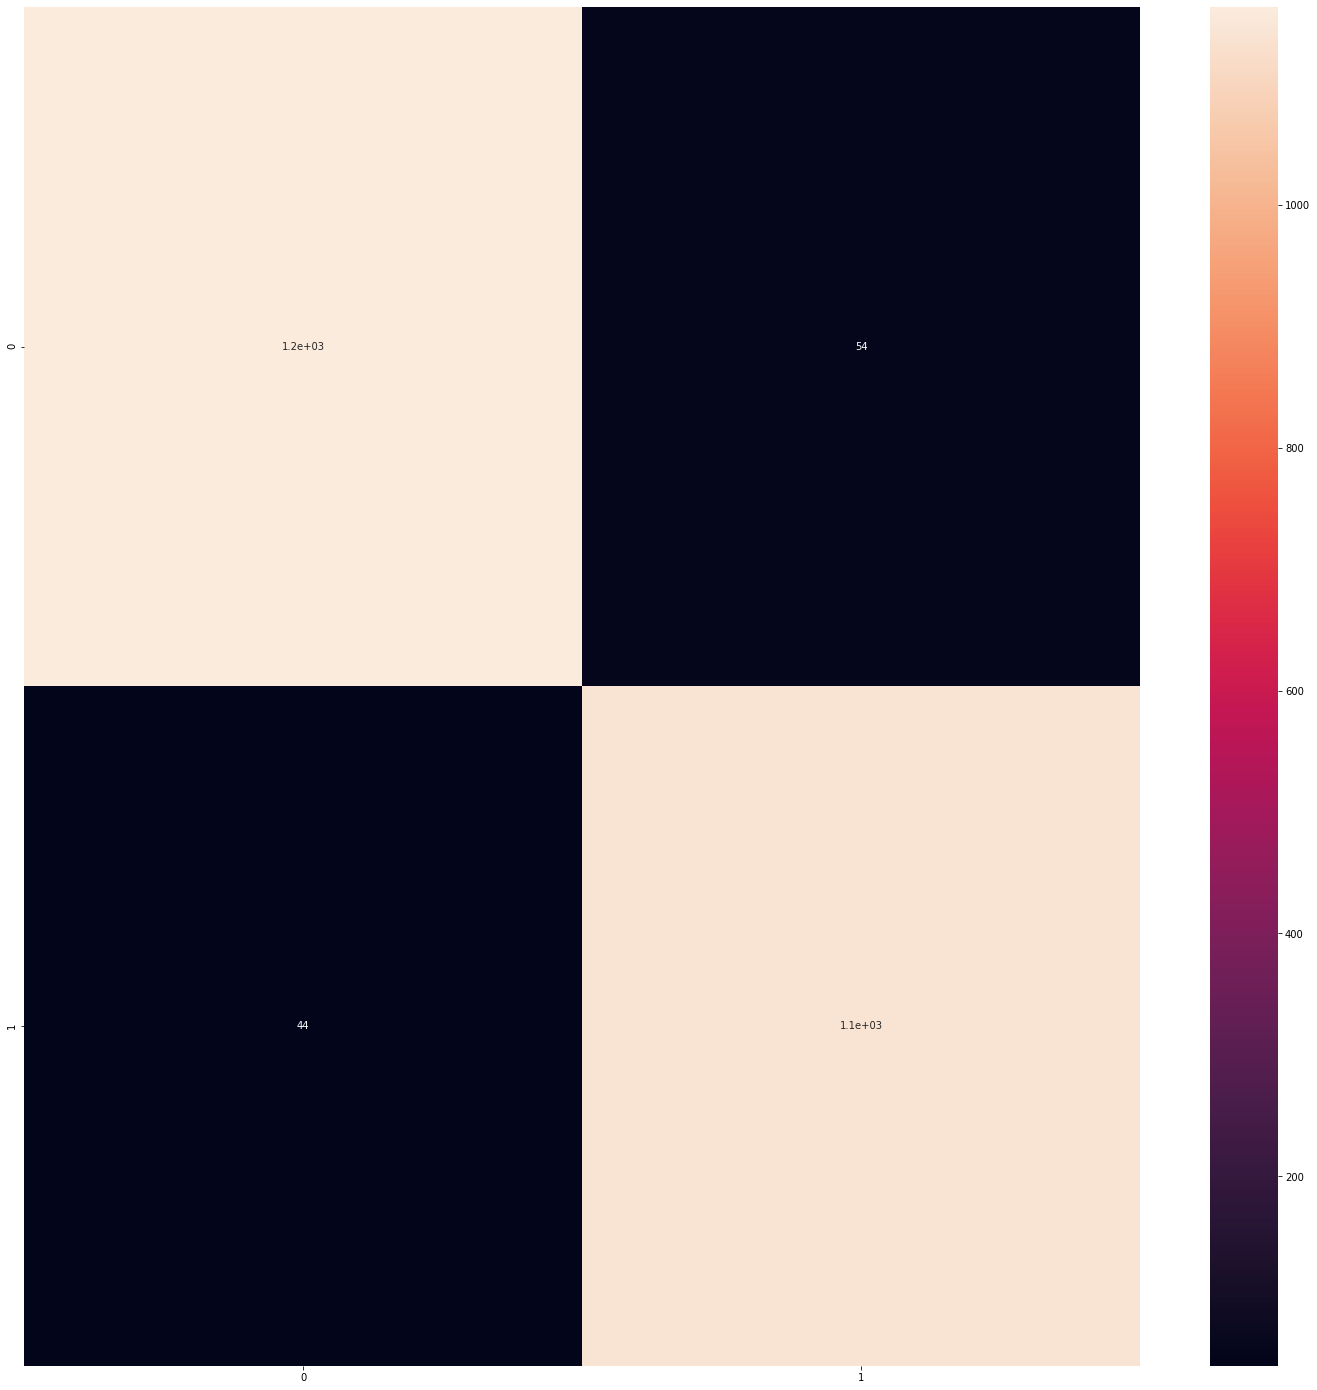

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_naive)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

In [20]:
import pickle
# save the model to disk
filename = 'NaiveB.sav'
pickle.dump(NaiveB, open(filename, 'wb'))

# #Decision Tree


In [21]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion="entropy")
dtc.fit(X_train,y_train)
y_dtc = dtc.predict(X_test)


In [22]:
accuracy = accuracy_score(y_test, y_dtc) # Dentre todas as classificações, quantas o modelo classificou corretamente? 
precision = precision_score(y_test, y_dtc) # Dentre todas as classificações de classe Positivo que o modelo fez, quantas estão corretas
recall = recall_score(y_test, y_dtc) #  dentre todas as situações de classe Positivo como valor esperado, quantas estão corretas

f1 = f1_score(y_test, y_dtc) # média harmônica entre precisão e recall

print("Model Accuracy : ", accuracy)
print("Model Precision : ", precision)
print("Model Recall : ", recall)
print("Model F1 Score : ", f1)

Model Accuracy :  0.9941666666666666
Model Precision :  0.9924178601516428
Model Recall :  0.9957734573119188
Model F1 Score :  0.9940928270042193


<AxesSubplot:>

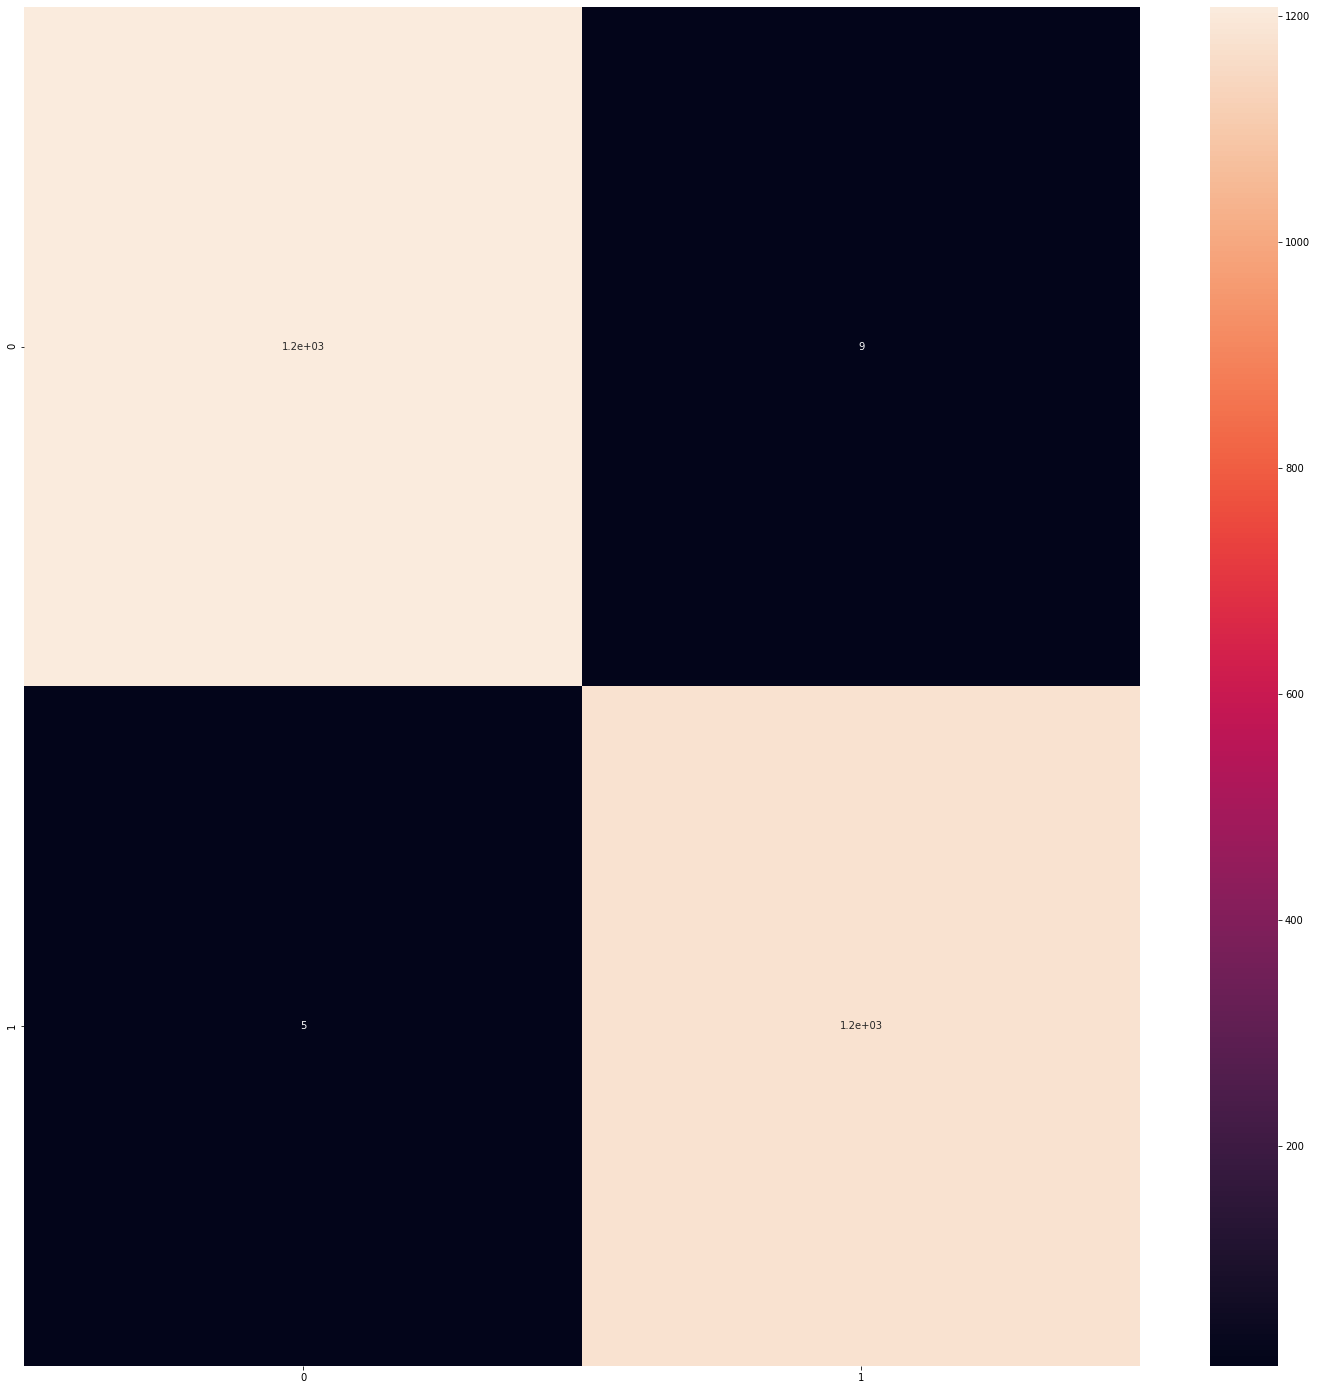

In [23]:
cm = confusion_matrix(y_test, y_dtc)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

In [24]:
# save the model to disk
filename = 'DecisionT.sav'
pickle.dump(dtc, open(filename, 'wb'))

# # Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train,y_train)
y_log = logisticRegr.predict(X_test)


In [26]:
accuracy = accuracy_score(y_test, y_log) # Dentre todas as classificações, quantas o modelo classificou corretamente? 
precision = precision_score(y_test, y_log) # Dentre todas as classificações de classe Positivo que o modelo fez, quantas estão corretas
recall = recall_score(y_test, y_log) #  dentre todas as situações de classe Positivo como valor esperado, quantas estão corretas

f1 = f1_score(y_test, y_log) # média harmônica entre precisão e recall

print("Model Accuracy : ", accuracy)
print("Model Precision : ", precision)
print("Model Recall : ", recall)
print("Model F1 Score : ", f1) 

Model Accuracy :  0.99375
Model Precision :  0.9915824915824916
Model Recall :  0.9957734573119188
Model F1 Score :  0.9936735554618304


<AxesSubplot:>

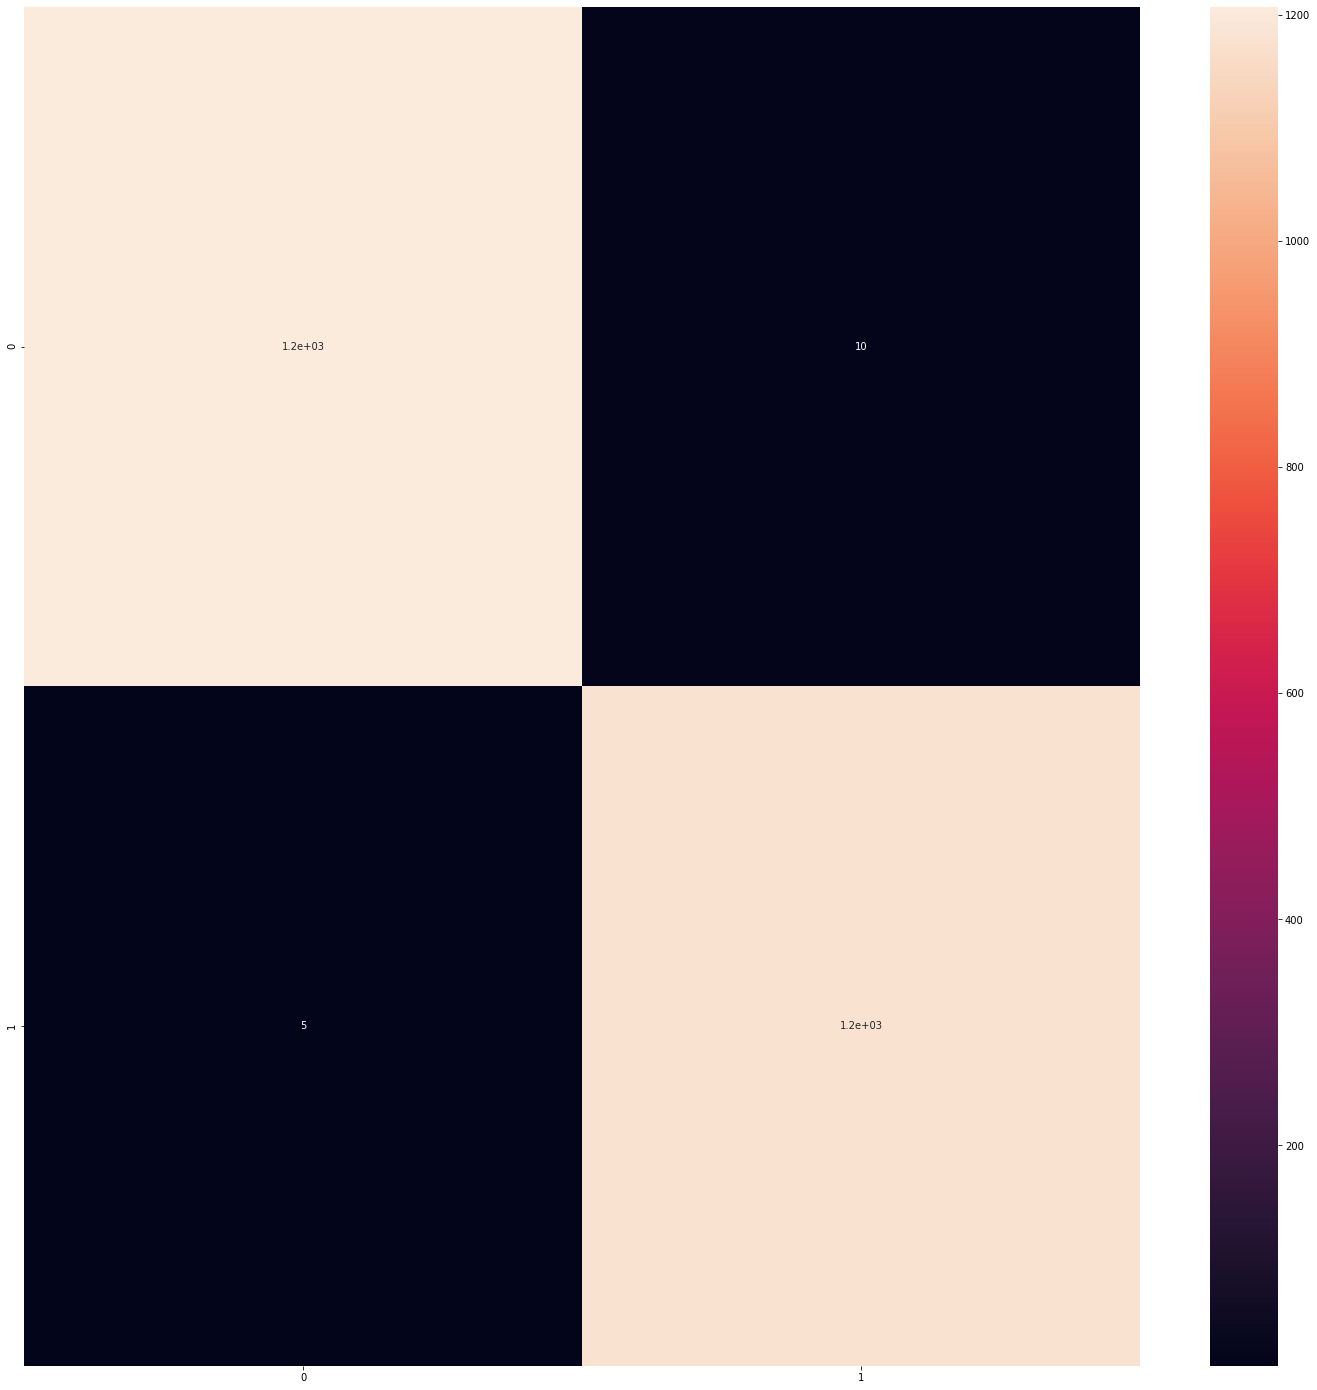

In [27]:
cm = confusion_matrix(y_test, y_log)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

# # Randon Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_rand = clf.predict(X_test)

In [29]:
accuracy = accuracy_score(y_test, y_rand) # Dentre todas as classificações, quantas o modelo classificou corretamente? 
precision = precision_score(y_test, y_rand) # Dentre todas as classificações de classe Positivo que o modelo fez, quantas estão corretas
recall = recall_score(y_test, y_rand) #  dentre todas as situações de classe Positivo como valor esperado, quantas estão corretas

f1 = f1_score(y_test, y_rand) # média harmônica entre precisão e recall

print("Model Accuracy : ", accuracy)
print("Model Precision : ", precision)
print("Model Recall : ", recall)
print("Model F1 Score : ", f1)

Model Accuracy :  0.9954166666666666
Model Precision :  0.992436974789916
Model Recall :  0.9983093829247676
Model F1 Score :  0.9953645174884113


<AxesSubplot:>

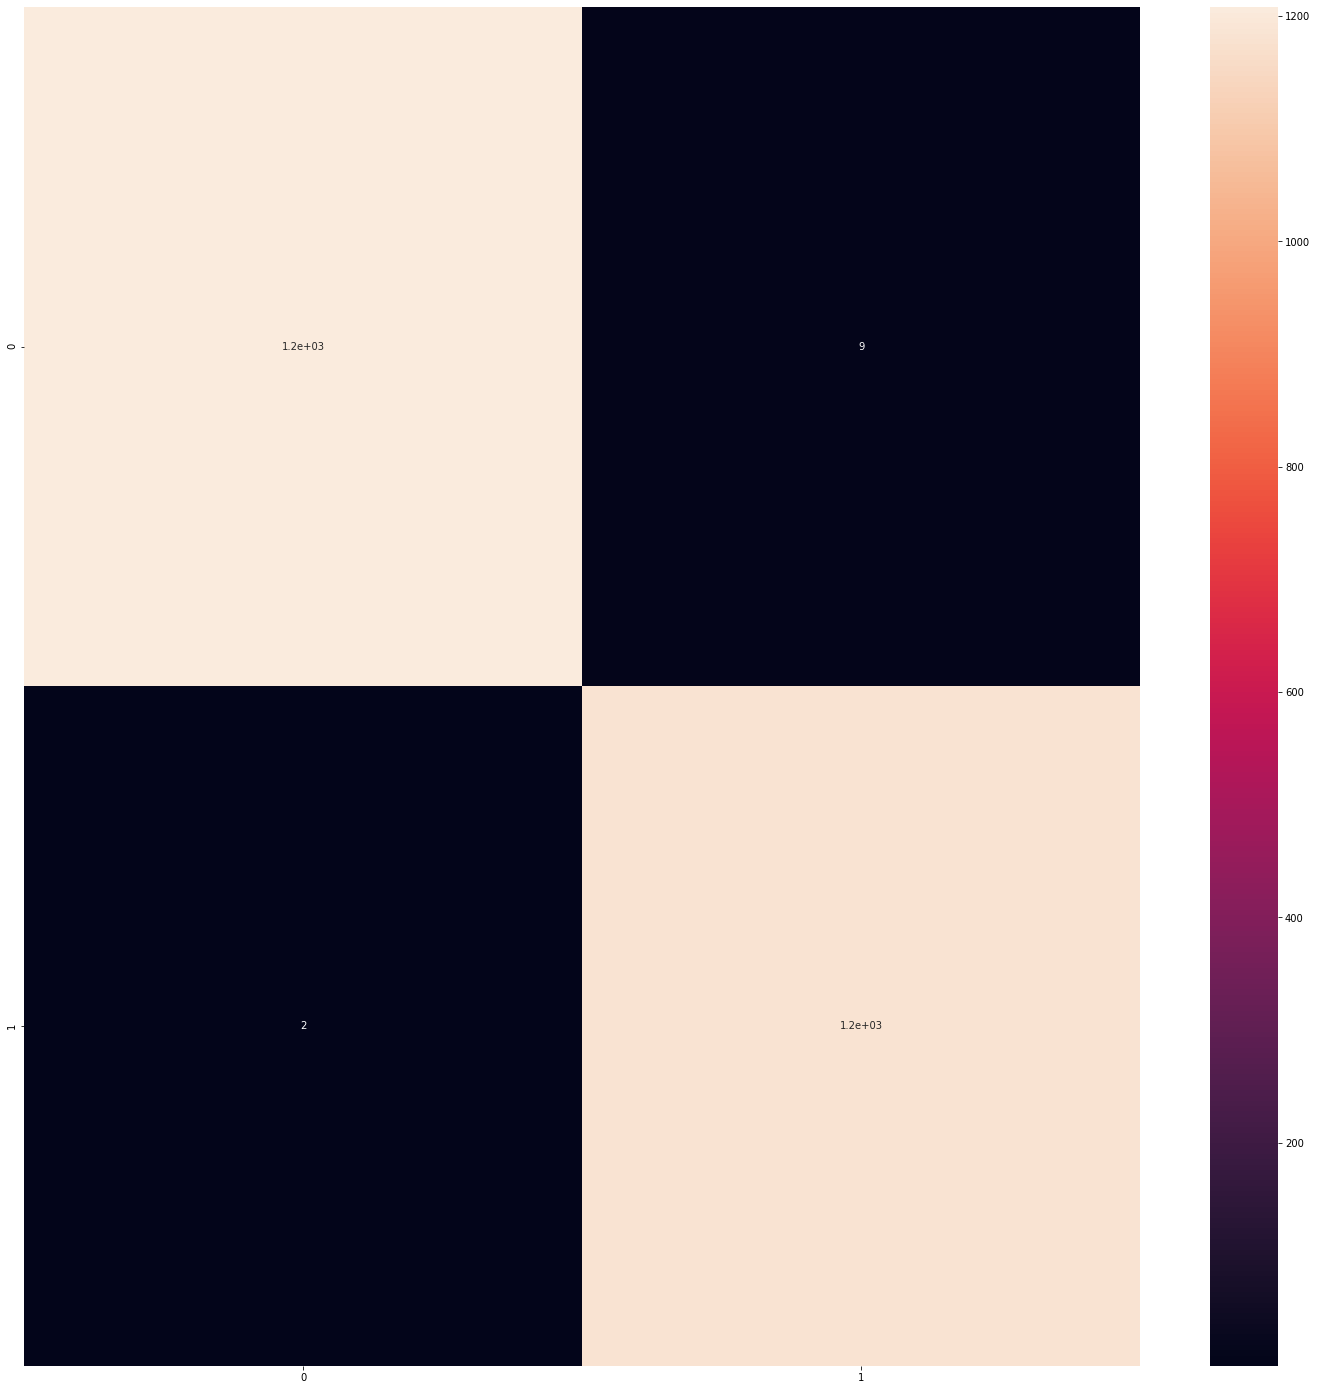

In [30]:
cm = confusion_matrix(y_test, y_rand)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)